In [1]:
%run Latex_macros.ipynb

<IPython.core.display.Latex object>

In [2]:
# My standard magic !  You will see this in almost all my notebooks.

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Reload all modules imported with %aimport
%load_ext autoreload
%autoreload 1

%matplotlib inline

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
         
    
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

import recipe_helper
%aimport recipe_helper


# Linear Model with higher order features

Our error analysis of the toy problem suggested that a straight line was perhaps not the best fit
- positive errors in the extremes
- negative errors in the center

Perhaps a "curve" would be a better hypothesis ?
What if our data is not linear ? 

Here's what the first dataset looked like

In [4]:
(xlabel, ylabel) = ("Size", "Price Premium")

# I will give you the data via a function (so I can easily alter the data in subsequent examples)
v1, a1 = 1, .005
lin = recipe_helper.Recipe_Helper(v = v1, a = a1)
X_lin, y_lin = lin.gen_data(num=50)

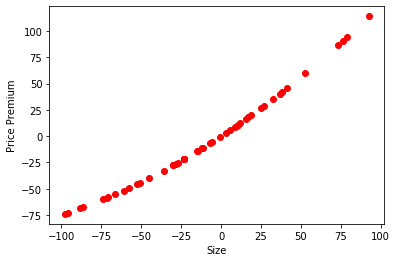

In [5]:
X_orig, y_orig = X_lin, y_lin 

_ = lin.gen_plot(X_orig, y_orig, xlabel, ylabel)

Coefficients: 
 [4.93224426] [[0.96836946]]


R-squared (test): 0.98
Root Mean squared error (test): 6.86


R-squared (train): 0.98
Root Mean squared error (train): 6.56


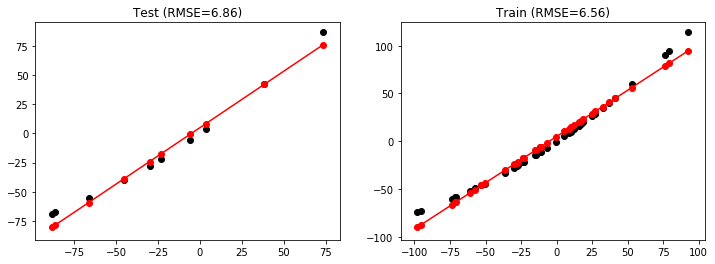

In [6]:
_= lin.run_regress(X_orig, y_orig)

We will make our point by creating a similar dataset (the "curvy" dataset) that **exagerates the curvature**.

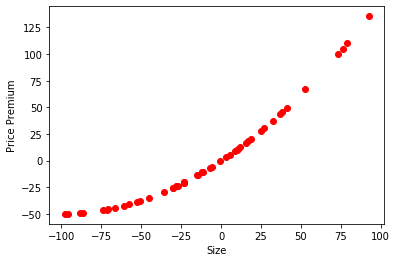

In [7]:
v2, a2 = v1, a1*2
curv = recipe_helper.Recipe_Helper(v = v2, a = a2)
X_curve, y_curve = curv.gen_data(num=50)
_= curv.gen_plot(X_curve,y_curve, xlabel, ylabel)

Coefficients: 
 [9.86448852] [[0.93673892]]


R-squared (test): 0.91
Root Mean squared error (test): 13.73


R-squared (train): 0.91
Root Mean squared error (train): 13.13


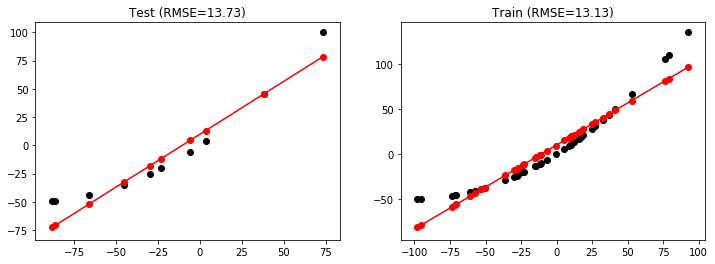

In [8]:
_= curv.run_regress(X_curve, y_curve)

Compared to the original, the "curvy" data set has a lot more curvature
- the $R^2$ is still over 90%
- but the Performance Metric (RMSE) is twice as big


## Curvature in a linear model

Our (first-order) linear model was

$$ y = \Theta_0 + \Theta_1  x $$

We can create a *second order* linear model by adding a feature $x^2$:

$$ y = \Theta_0 + \Theta_1  x + \Theta_2  x^2$$

$y$ is a second order polynomial, whose plot is a curve
- but it is linear in features $x, x^2$

In other words, we are performing feature iteration
- in this case: adding the missing feature $x^2$

Let's modify $\x^\ip$ from a vector of length 1:

$$
\x^\ip = (\x^\ip_1)
$$

to a vector of length 2:

$$
\x^\ip = (\x^\ip_1, {\x^\ip_1}^2)
$$

by adding a squared term to the vector $\x^\ip$, for each $i$.

The modified $\X'$ becomes:

$$
\X =
\begin{pmatrix}
  1  &\x^{(1)}_1   &  (\x^{(1)}_1)^2 \\ 
   1 &\x^{(2)}_1   &  (\x^{(2)}_1)^2\\ 
   \vdots & \vdots &                \\
   1 &\x^{(m)}_1   &  (\x^{(m)}_1)^2\ \
  \end{pmatrix}
$$

Note that this modified $\X'$ fits perfectly within our Linear hypothesis
$$
\hat{\y} = \X' \Theta
$$

The requirement is that the model be linear in its *features*, **not** that the features be linear !

What we have done is added a second feature, that just so happens to be related to the first.

We can now run our linear model with the modified feature vectors

**A word about our module**
- we add the $x^2$ column by setting optional parameter `run_transform` to `True`


Coefficients: 
 [-3.55271368e-15] [[1.    0.005]]


R-squared (test): 1.00
Root Mean squared error (test): 0.00


R-squared (train): 1.00
Root Mean squared error (train): 0.00


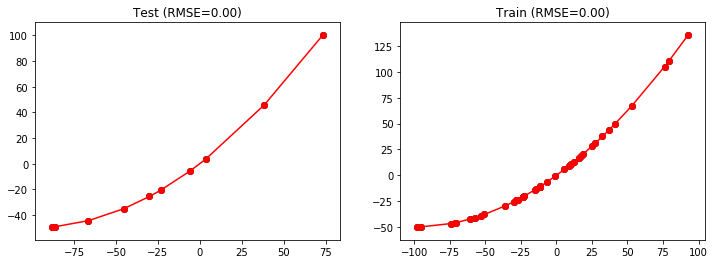

In [9]:
_= curv.run_regress(X_curve, y_curve, run_transforms=True)

Perfect fit !

<div class="alert alert-block alert-success">
<b>TIP</b>
<br>
    <ul>
        <li>Don't stop just because you scored 91%. And don't give up if the score was awful.</li>

<li>Examining the errors (residuals) reveals alot about how to improve your model.
     <ul>
    <li>Where was the fit good ? Where was it bad ? </li>
    <li>Is there a pattern to the badly fit observations that points to a missing 
         feature ?</li>
          </ul>
    </li>
</div>

One of the real arts of ML is diagnosing model deficiencies and knowing how to improve them.

We will have a separate module on this topic.

In [10]:
print("Done !")

Done !
